## Avishkar Dinesh Chothwe
#Roll no:282029
#PRN : 22310789
Assignment-5

# Step 1: Import Required Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

# Step 2:Load the Dataset

In [23]:
df = pd.read_excel("Mall_Customers.csv.xlsx")

In [24]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Step 3: Data Preprocessing

In [25]:
# Select relevant features
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [26]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: Data Preparation (Train-Test Split)
 Note: Clustering is unsupervised, but we show splitting for completeness


In [27]:
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Step 5: Apply Clustering Algorithm

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)

agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(scaled_data)
agglo_silhouette = silhouette_score(scaled_data, agglo_labels)

# Step 6: Visualize Clusters

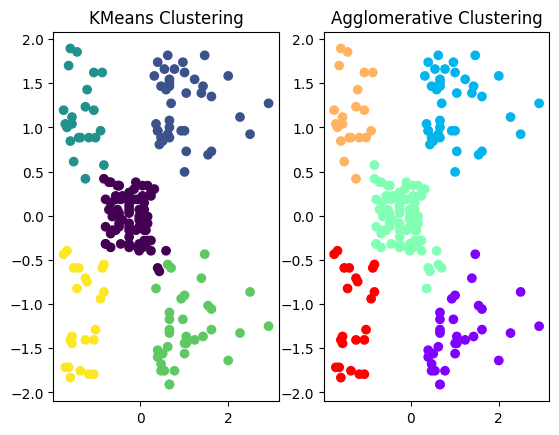

In [29]:
plt.subplot(1, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')

plt.subplot(1, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agglo_labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.show()

# Step 7: Print Evaluation Metrics

In [30]:
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Agglomerative Silhouette Score: {agglo_silhouette:.4f}")

KMeans Silhouette Score: 0.5547
Agglomerative Silhouette Score: 0.5538


# Step 8: Cross-Validation on Clustering


In [31]:
def cross_validate_clustering(model, data, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for train_index, _ in kf.split(data):
        fold_data = data[train_index]
        labels = model.fit_predict(fold_data)
        score = silhouette_score(fold_data, labels)
        scores.append(score)

    return np.mean(scores), np.std(scores)

In [32]:
# Apply cross-validation to both models
kmeans_cv_score, kmeans_cv_std = cross_validate_clustering(KMeans(n_clusters=5, random_state=42), scaled_data)
agglo_cv_score, agglo_cv_std = cross_validate_clustering(AgglomerativeClustering(n_clusters=5), scaled_data)


# Step 8: Display Cross-Validation Results

In [33]:
print("\nCross-Validation Silhouette Scores:")
print(f"KMeans CV Silhouette Score: {kmeans_cv_score:.4f} ± {kmeans_cv_std:.4f}")
print(f"Agglomerative CV Silhouette Score: {agglo_cv_score:.4f} ± {agglo_cv_std:.4f}")


Cross-Validation Silhouette Scores:
KMeans CV Silhouette Score: 0.5333 ± 0.0386
Agglomerative CV Silhouette Score: 0.5455 ± 0.0137
